In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read the data
df = pd.read_excel("SP. Dataset - Advanced.xlsx", sheet_name="Dataset", index_col="Date")

# Show the first 5 rows
df.head()

,Open,High,Low,Close,Adj Close,Volume,Price - FTSE 250,Price - FTSE 100,Price - GBP - USD,Price - XLF (financial sector index),Price - EWU,Change % - volatility index,gold price
Date,,,,,,,,,,,,,
2012-12-31,240.245998,243.572501,240.015032,242.463661,176.294033,8.654190e+06,7958.42,5897.81,1.6253,13.31,35.88,-0.2069,1357.398
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,8115.70,6027.37,1.6256,13.69,36.42,NaN,1367.928
2013-01-03,252.449969,256.346271,250.777993,253.690802,184.457215,3.047824e+07,8141.06,6047.34,1.6107,13.68,36.10,-0.0082,1356.426
2013-01-04,254.449875,257.603359,252.924079,255.883361,186.051448,3.391028e+07,8169.14,6089.84,1.6071,13.85,36.36,-0.0501,1335.609
2013-01-07,258.571368,265.438675,254.007233,264.276487,192.154031,6.584778e+07,8186.58,6064.58,1.6114,13.81,36.28,-0.0029,1333.503


In [6]:
# Rename columns
df.rename(columns={'Adj Close':'Adj_Close', 'Price - FTSE 250 ':'FTSE250_Price',
                   'Price - FTSE 100':'FTSE100_Price', 'Price - GBP - USD':'GBP_USD_Price',
                   'Price - XLF (financial sector index) ':'XLF_Price', 'Price - EWU':'EWU_Price', 
                   'Change % - volatility index':'VIX_PC', 'gold price ':'Gold_Price'}, inplace=True)


In [19]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'FTSE250_Price',
       'FTSE100_Price', 'GBP_USD_Price', 'XLF_Price', 'EWU_Price', 'VIX_PC',
       'Gold_Price', 'Close_Interpolated_Linear'],
      dtype='object')

AIM: Predict the missing values in the Close Price History

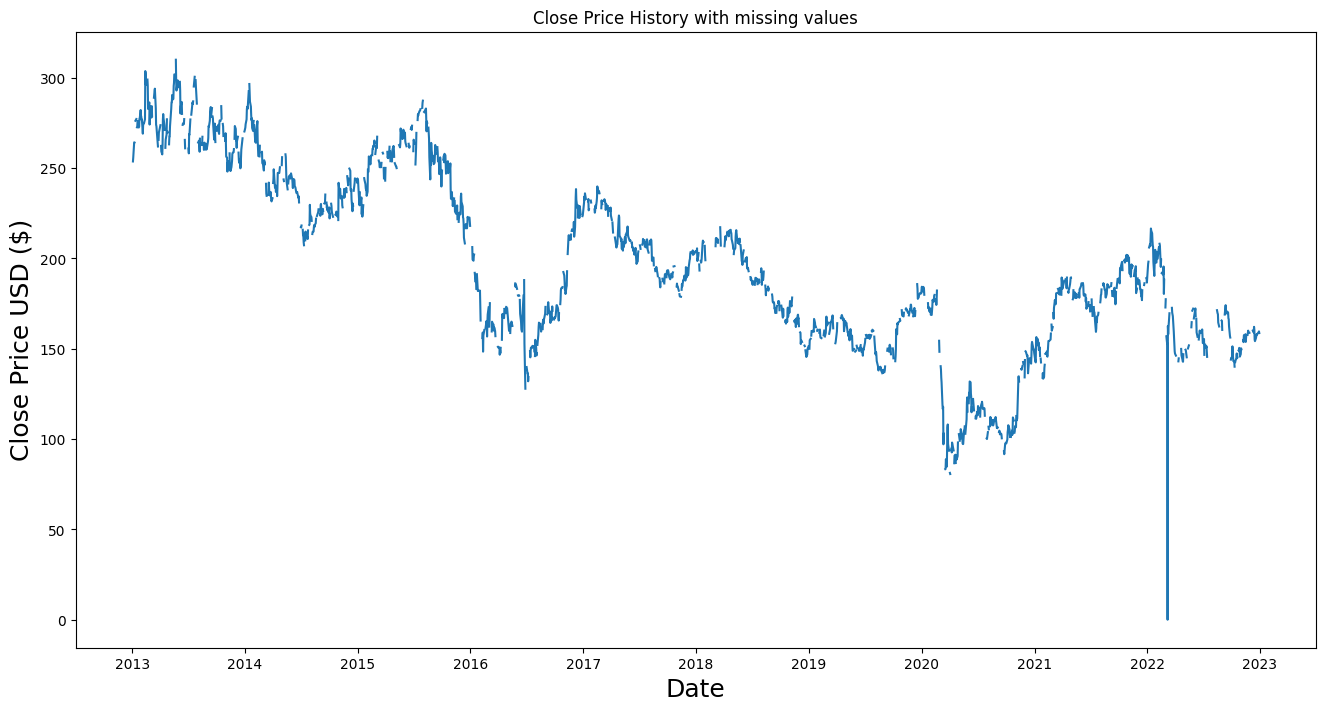

In [7]:
# Visualize Close data
plt.figure(figsize=(16,8))
plt.title('Close Price History with missing values')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()



In [8]:
# Find dates where Close is missing
df[df['Close'].isna()]

,Open,High,Low,Close,Adj_Close,Volume,FTSE250_Price,FTSE100_Price,GBP_USD_Price,XLF_Price,EWU_Price,VIX_PC,Gold_Price
Date,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,8115.70,6027.37,1.6256,13.69,36.42,NaN,1367.928
2013-01-09,NaN,NaN,NaN,NaN,NaN,NaN,8180.44,6098.65,1.6023,13.75,36.18,NaN,1340.955
2013-01-10,NaN,NaN,NaN,NaN,NaN,NaN,8194.42,6101.51,1.6168,13.93,36.56,NaN,1359.180
2013-01-15,NaN,NaN,NaN,NaN,NaN,NaN,8222.75,6117.31,1.6066,13.91,36.50,NaN,1363.959
2013-01-21,NaN,NaN,NaN,NaN,NaN,NaN,8365.19,6180.98,1.5830,0.00,0.00,NaN,1371.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-29,NaN,NaN,NaN,NaN,NaN,NaN,15940.14,7512.00,1.1953,35.70,30.98,NaN,1428.597
2022-11-30,NaN,NaN,NaN,NaN,NaN,NaN,15921.17,7573.05,1.2056,36.31,31.53,NaN,1425.519
2022-12-02,NaN,NaN,NaN,NaN,NaN,NaN,16101.91,7556.23,1.2287,35.93,31.90,NaN,1465.776


Simplest solution: Linear Interpolation

In [9]:
# Linearly interpolate missing values to new column
df['Close_Interpolated_Linear'] = df['Close'].interpolate(method='linear')

In [10]:
df[df.Close.isna()][['Close', 'Close_Interpolated_Linear']]

,Close,Close_Interpolated_Linear
Date,,
2013-01-02,NaN,248.077232
2013-01-09,NaN,268.201522
2013-01-10,NaN,272.212468
2013-01-15,NaN,274.891572
2013-01-21,NaN,274.326139
...,...,...
2022-11-29,NaN,158.760954
2022-11-30,NaN,158.695713
2022-12-02,NaN,157.338261


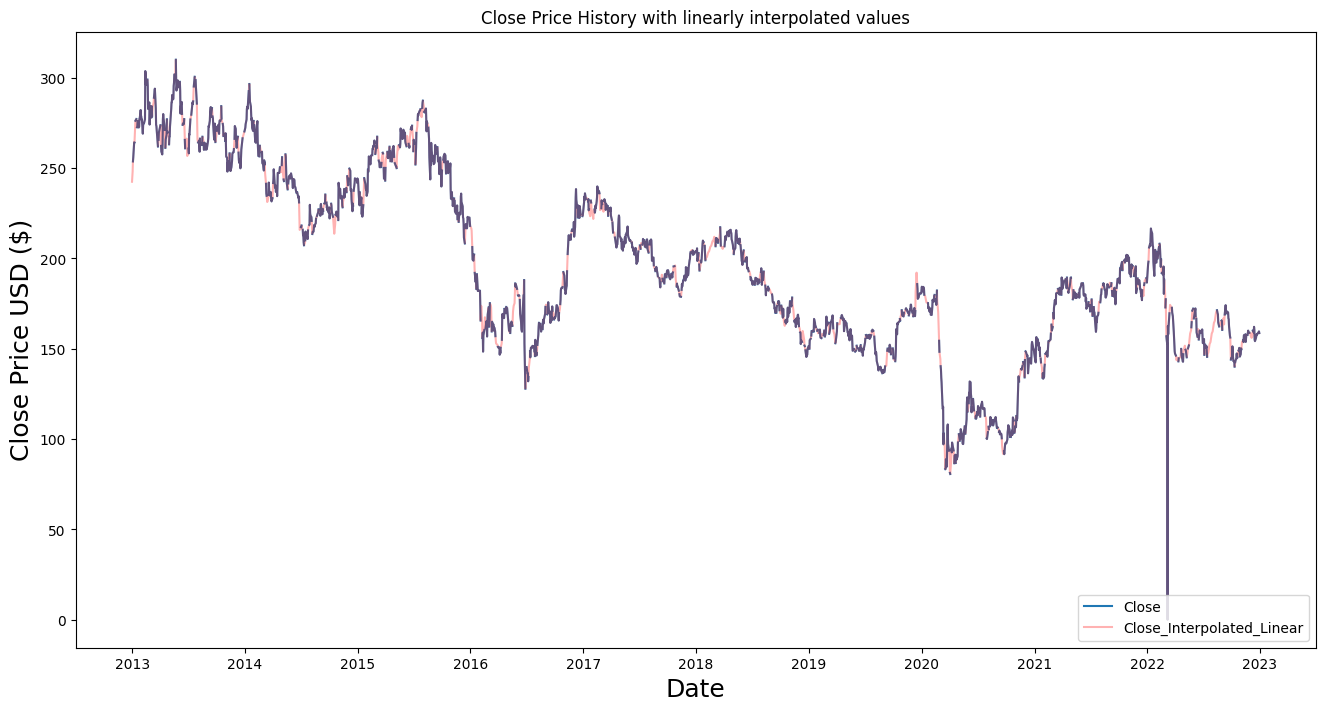

In [11]:
#Plot where Close is missing
plt.figure(figsize=(16,8))
plt.title('Close Price History with linearly interpolated values')
plt.plot(df['Close'])
plt.plot(df['Close_Interpolated_Linear'],c='red',alpha=0.3)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(['Close', 'Close_Interpolated_Linear'], loc='lower right')
plt.show()


Feature Engineering:\
Potential features to add:\
Lagged Close\
Rolling means\
Interactions between variables

In [12]:
None

Data Splits:\
 20% is evaluation set\
Take remaining 10% as test data and rest as training.


In [13]:
# Define evaluation data
eval_df = df[df.Close.isna()]

In [14]:
# Observe how much missing data is in the train and test sets
df[df.Close.notna()].isna().sum()

Open                          0
High                          0
Low                           0
Close                         0
Adj_Close                     0
Volume                        0
FTSE250_Price                 0
FTSE100_Price                 0
GBP_USD_Price                 0
XLF_Price                    37
EWU_Price                    37
VIX_PC                       31
Gold_Price                    0
Close_Interpolated_Linear     0
dtype: int64

In [15]:
#Get dates for missing train and test data
df[df.Close.notna()].isna().index

DatetimeIndex(['2012-12-31', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-11', '2013-01-14', '2013-01-16',
               '2013-01-17', '2013-01-18',
               ...
               '2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20',
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2015, freq=None)

We will choose to drop this missing data but can also experiment later on with interpolating this to gain additional ~30 data points.

In [16]:
# Drop missing values in train and test sets
test_and_train_df = df[df.Close.notna()].dropna()

In [17]:
 # Define percentage of data to be used for training
train_percent = 0.9

# Define train and test sets randomly
train_df = test_and_train_df.sample(frac=train_percent,random_state=0)
test_df = test_and_train_df.drop(train_df.index)


Model Selection Ideas:\

Autoregressive Integrated Moving Average (ARIMA):

ARIMA models are a class of statistical models that can capture different aspects of time series data. They are particularly useful for capturing trends and seasonality.
Seasonal Decomposition of Time Series (STL):

STL decomposes time series data into seasonal, trend, and residual components, making it easier to model and predict each component individually.
Prophet:

Prophet is an open-source forecasting tool developed by Facebook that is designed for forecasting time series data that exhibit seasonal patterns and have holiday effects.
Exponential Smoothing Methods (e.g., Holt-Winters):

Exponential smoothing methods like Holt-Winters can be effective for capturing trends and seasonality in time series data.
Long Short-Term Memory (LSTM):

LSTMs are a type of recurrent neural network (RNN) that are well-suited for processing sequences of data. They can capture complex relationships in time series data.
Gated Recurrent Unit (GRU):

GRUs are another type of recurrent neural network similar to LSTMs. They can also be effective for time series forecasting tasks.
XGBoost, Random Forest, and Gradient Boosting Models:

Ensemble learning models like XGBoost, Random Forest, and Gradient Boosting can be adapted for time series forecasting by incorporating lagged values as features.
Support Vector Machines (SVM):

SVMs can be used for time series regression by transforming the time series data into a feature space and applying the SVM algorithm.
Neural Prophet:

Neural Prophet is an extension of the Prophet model that leverages neural networks for improved forecasting capabilities.
Convolutional Neural Networks (CNNs):

CNNs, primarily designed for image recognition, can also be adapted for time series forecasting by treating the time series as an image with one dimension.
Gaussian Process Regression (GPR):

GPR is a probabilistic model that can be used for time series forecasting. It provides uncertainty estimates along with predictions.
VAR (Vector Autoregressive) Models:

VAR models can be useful when you have multiple time series variables, and you want to model the relationships between them.
Facebook's NeuralProphet:

NeuralProphet is an extension of Prophet that leverages neural networks for improved performance.

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional